In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from pydiffmap import diffusion_map as dm
from scipy.cluster import hierarchy

# Slide 15

In [5]:
stocksample = pd.read_csv("stocksample.txt", sep="\t")

scaler = MinMaxScaler()
stocksamplescl = scaler.fit_transform(stocksample.iloc[:,4:34])

# Slide 16

In [35]:
kmout = KMeans(n_clusters=10, n_init=10, init="k-means++").fit(stocksamplescl)

# Slide 17

In [73]:
stocksample["kmclust"] = kmout.labels_
stocksample["kmclust"] = stocksample["kmclust"].astype('category').cat.as_unordered()

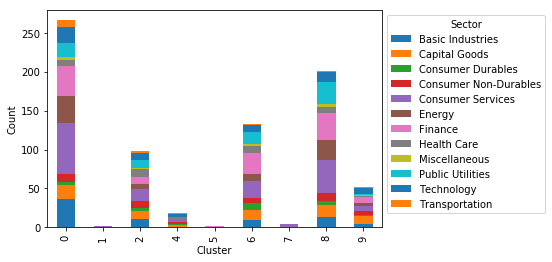

In [74]:
df = stocksample.groupby(["kmclust", "sector"])["symb"].count().unstack("sector").fillna(0)
df.plot(kind='bar', stacked=True, legend=False)
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title="Sector", bbox_to_anchor=(1.0, 1.0))

# Slide 19

In [75]:
stockdistmat = squareform(pdist(stocksamplescl, metric='euclidean'))
dmap = dm.DiffusionMap.from_sklearn(n_evecs=2, epsilon=50, alpha=1, k=10)
stockdiffmap = dmap.fit_transform(stockdistmat)
stocksample["dmap1"] = stockdiffmap[:, 0]
stocksample["dmap2"] = stockdiffmap[:, 1]

Text(0, 0.5, 'Second Diffusion Coordinate')

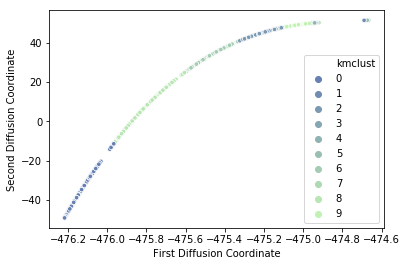

In [76]:
# note: seaborn throws a type error with "hue" because it uses duck typing, so we explicitly specify the palette
ax = sns.scatterplot(x="dmap1", y="dmap2", data=stocksample.drop(stocksample.index[743]),
                     s=20, hue="kmclust",
                     palette=[((x+10)/25.0, (x+10)/20.0, 0.7) for x in range(10)])
plt.xlabel("First Diffusion Coordinate")
plt.ylabel("Second Diffusion Coordinate")

# Slide 23

In [100]:
x = np.random.normal(loc=[0,0,0,0,0,5,5,5,7,7], scale=0.5, size=10)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [60.0, 60.0, 82.5, 82.5],
  [21.25, 21.25, 71.25, 71.25]],
 'dcoord': [[0.0, 0.18077295926595702, 0.18077295926595702, 0.0],
  [0.0, 0.27691411169739183, 0.27691411169739183, 0.0],
  [0.0, 0.6345668370057089, 0.6345668370057089, 0.27691411169739183],
  [0.18077295926595702,
   0.999846758674855,
   0.999846758674855,
   0.6345668370057089],
  [0.0, 0.030188902125872552, 0.030188902125872552, 0.0],
  [0.0, 0.17856637213207183, 0.17856637213207183, 0.0],
  [0.0, 0.40264034377850155, 0.40264034377850155, 0.17856637213207183],
  [0.030188902125872552,
   1.9211581920490763,
   1.9211581920490763,
   0.40264034377850155],
  [0.999846758674855,
   7.100612818736563,
   7.100612818736563,
   1.9211581920490763]],
 'ivl': ['0', '3', '4', '1', '2', '8', '9', '7', '5', '6'],
 'leaves': [0, 3, 

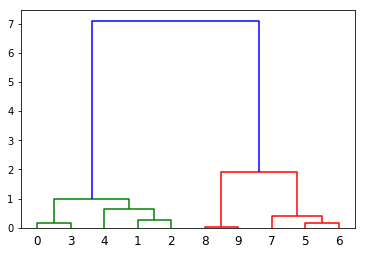

In [109]:
Z = hierarchy.linkage(x.reshape(10,1), "complete")
hierarchy.dendrogram(Z)

# Slide 29

C:\Users\David\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [30.0, 30.0, 50.0, 50.0],
  [10.0, 10.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [110.0, 110.0, 132.5, 132.5],
  [80.0, 80.0, 121.25, 121.25],
  [25.0, 25.0, 100.625, 100.625],
  [155.0, 155.0, 165.0, 165.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [160.0, 160.0, 182.5, 182.5],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [205.0, 205.0, 222.5, 222.5],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [245.0, 245.0, 262.5, 262.5],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [345.0, 345.0, 355.0, 355.0],
  [365.0, 365.0, 375.0, 375.0],
  [350.0, 350.0, 370.0, 370.0],
  [322.5, 322.5, 360.0, 360.0]

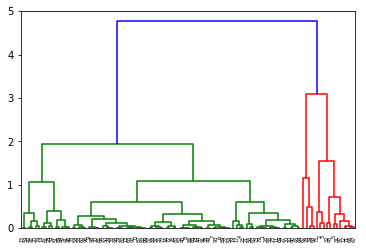

In [185]:
hcout = hierarchy.linkage(stockdistmat[:100,:100], "complete")
hierarchy.dendrogram(hcout)

# Slide 31

In [192]:
hierarchy.fcluster(hcout, t=1.15)

array([ 5,  9, 11, 11,  9, 13,  8,  8,  7,  5,  9,  9, 14,  5,  2,  1,  6,
        9,  7,  9,  1,  9,  8,  9,  5,  9,  9,  9,  2,  5,  9, 13, 12,  5,
       10,  6,  5,  6,  8,  2,  7,  4,  1, 12,  7,  9,  4,  1,  4,  8,  5,
        3,  7,  5,  8,  9,  9,  6,  5,  1,  5,  2, 10,  9,  9,  5, 15, 15,
       10,  9,  5, 14,  6,  9,  1, 11,  6,  6, 10,  9,  6,  5,  5,  5,  3,
        7,  7,  5,  6,  8,  9,  7,  5,  8,  5,  5,  5, 16,  5,  5],
      dtype=int32)

In [196]:
hierarchy.fcluster(hcout, t=1.153)

array([2, 3, 4, 4, 3, 4, 2, 2, 2, 2, 3, 3, 4, 2, 1, 1, 2, 3, 2, 3, 1, 3,
       2, 3, 2, 3, 3, 3, 1, 2, 3, 4, 4, 2, 4, 2, 2, 2, 2, 1, 2, 1, 1, 4,
       2, 3, 1, 1, 1, 2, 2, 1, 2, 2, 2, 3, 3, 2, 2, 1, 2, 1, 4, 3, 3, 2,
       4, 4, 4, 3, 2, 4, 2, 3, 1, 4, 2, 2, 4, 3, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 4, 2, 2], dtype=int32)

# Slide 32

In [220]:
hcout = hierarchy.linkage(stockdistmat, "complete")
stocksample["hcclust"] = hierarchy.fcluster(hcout, t=1.1547)
stocksample["hcclust"] = stocksample["hcclust"].astype('category').cat.as_unordered()

C:\Users\David\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


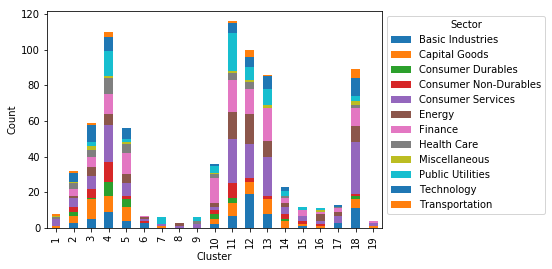

In [222]:
df = stocksample.groupby(["hcclust", "sector"])["symb"].count().unstack("sector").fillna(0)
df.plot(kind='bar', stacked=True, legend=False)
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title="Sector", bbox_to_anchor=(1.0, 1.0))